In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/clean.csv")
df.head()

,language,total_speakers,native_speakers,origin
0,English,1132366680,379007140.0,Indo-European
1,Mandarin Chinese,1116596640,917868640.0,Sino-Tibetan
2,Hindi,615475540,341208640.0,Indo-European
3,Spanish,534335730,460093030.0,Indo-European
4,French,279821930,77177210.0,Indo-European


In [4]:
plt.style.use('ggplot')

title_font = {'fontsize': 14, 'fontweight': 'bold'}
label_font = {'fontsize': 12}

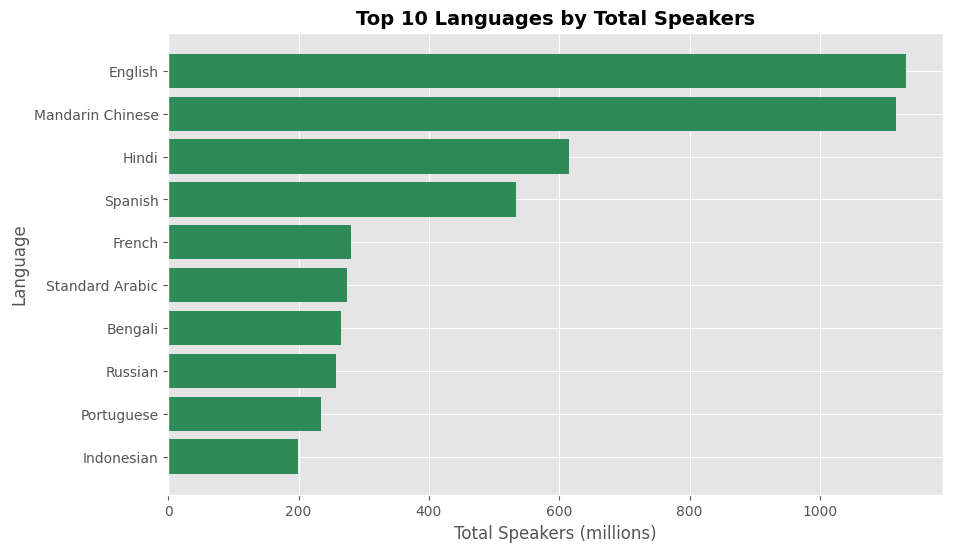

In [5]:
top_10_speakers = df.nlargest(10, 'total_speakers').sort_values('total_speakers', ascending=True)

plt.figure(figsize=(10, 6))

plt.barh(top_10_speakers['language'], top_10_speakers['total_speakers'] / 1e6, color='seagreen')

plt.title('Top 10 Languages by Total Speakers', **title_font)
plt.xlabel('Total Speakers (millions)', **label_font)
plt.ylabel('Language', **label_font)

plt.show()

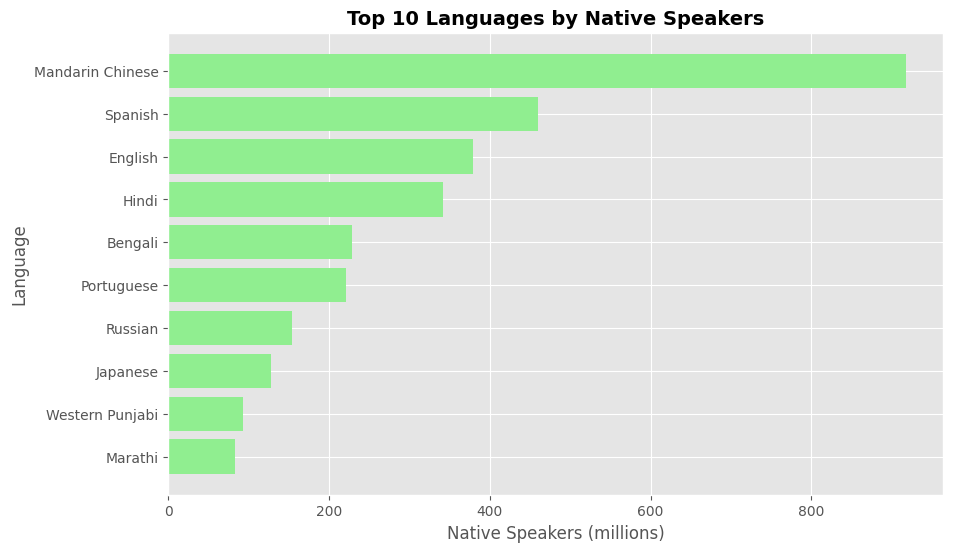

In [6]:
top_10_native = df.nlargest(10, 'native_speakers').sort_values('native_speakers', ascending=True)

plt.figure(figsize=(10, 6))

plt.barh(top_10_native['language'], top_10_native['native_speakers'] / 1e6, color='lightgreen')

plt.title('Top 10 Languages by Native Speakers', **title_font)
plt.xlabel('Native Speakers (millions)', **label_font)
plt.ylabel('Language', **label_font)

plt.show()

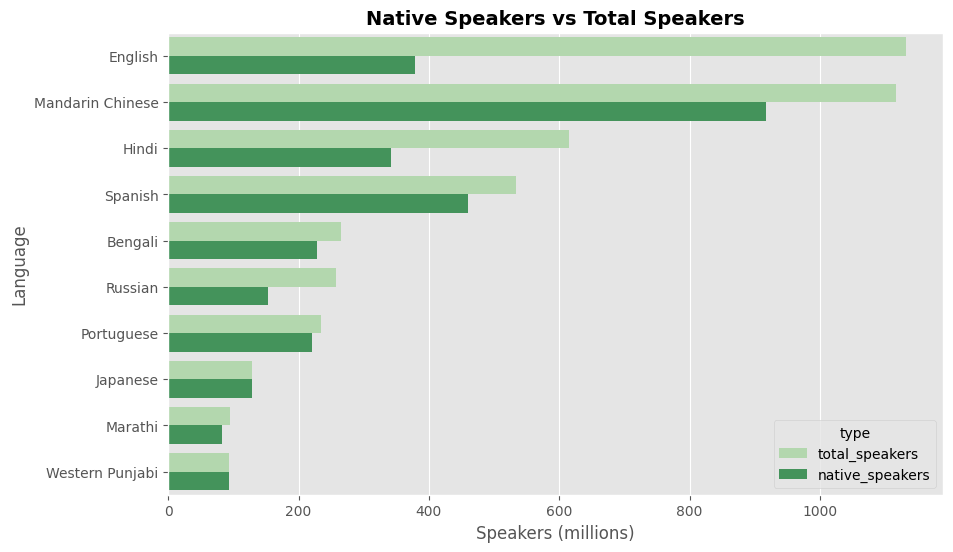

In [21]:
df_melted = top_10_native.melt(
    id_vars='language',
    value_vars= ['native_speakers', 'total_speakers'],
    var_name='type',
    value_name='speakers'
)

df_melted = df_melted.sort_values('speakers', ascending=False)

df_melted['speakers_mln'] = df_melted['speakers'] / 1e6

plt.figure(figsize=(10, 6))

sns.barplot(data=df_melted, x='speakers_mln', y= 'language', hue='type', palette='Greens')

plt.title('Native Speakers vs Total Speakers', **title_font)
plt.xlabel('Speakers (millions)', **label_font)
plt.ylabel('Language', **label_font)

plt.show()